In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sizes = pl.read_csv("../ptu_derep/derep_plasmids_lengths.tsv", separator="\t")

# sizes = sizes.with_columns(pl.when(pl.col('Plasmid').str.contains('IMGPR')).then(pl.col('Plasmid').str.split('|').list.get(0)).otherwise(pl.col('Plasmid')))

# sizes.write_csv("../ptu_derep/derep_plasmids_lengths_fixed.tsv", separator="\t")

In [ ]:
df = pl.read_csv(
    "../complete_plasmids_hosts_with_possible_accession.tsv",
    separator="\t",
)
df = df.with_columns(
    plasmid_length_kb=pl.col("plasmid_length") / 1000,
    host_length_mb=pl.col("host_size") / 1000_000,
    plasmid_type=pl.when(pl.col("Plasmid").str.contains("IMGPR|Refsoil|PLSDB"))
    .then(pl.lit("isolate"))
    .otherwise(pl.lit("meta")),
)

# df = df.with_columns(
#     host_origin=pl.when(pl.col("column_4").str.contains("Isolate"))
#     .then(pl.lit("Isolate"))
#     .otherwise(pl.lit("MAG"))
# )
# sizes = pl.read_csv("../ptu_derep/derep_plasmids_lengths.tsv", separator="\t")
# df = df.join(sizes, left_on="column_1", right_on="Plasmid")
df.head()

Plasmid,host,method,accession,host_type,host_size,plasmid_length,plasmid_length_kb,host_length_mb,plasmid_type
str,str,str,str,str,i64,i64,f64,f64,str
"""3300003203|JGI…","""d__Bacteria;p_…","""iphop-blast""","""GCA_020199775.…","""mag""",5908740,43171,43.171,5.90874,"""meta"""
"""3300003203|JGI…","""d__Bacteria;p_…","""iphop-blast""","""GCA_020200155.…","""mag""",4251322,43171,43.171,4.251322,"""meta"""
"""3300003320|roo…","""d__Bacteria;p_…","""iphop-RaFAH""","""3000227121""","""isolate""",8341603,12299,12.299,8.341603,"""meta"""
"""3300003320|roo…","""d__Bacteria;p_…","""iphop-RaFAH""","""2927997529""","""isolate""",7854064,12299,12.299,7.854064,"""meta"""
"""3300003320|roo…","""d__Bacteria;p_…","""iphop-RaFAH""","""2896060037""","""isolate""",7566962,12299,12.299,7.566962,"""meta"""


First, we compared the genome size of the isolate plasmids and correlated that to the genome size of their hosts

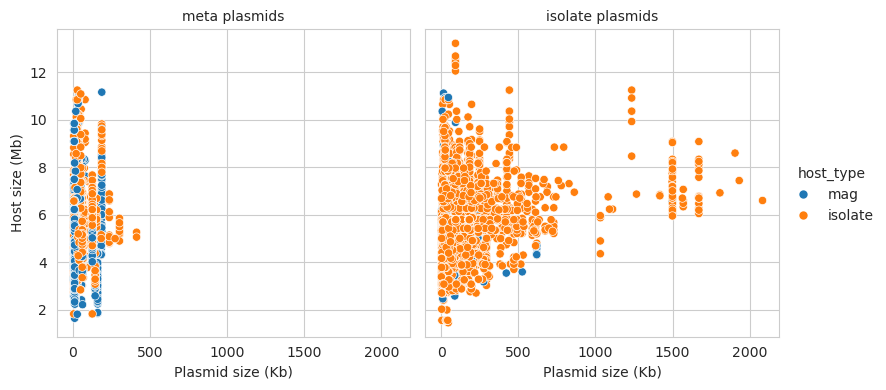

In [4]:
sns.set_style("whitegrid")
g = sns.relplot(
    df.to_pandas(),
    x="plasmid_length_kb",
    y="host_length_mb",
    col="plasmid_type",
    hue="host_type",
    height=4,
    aspect=1,
    facet_kws={"despine": False},
)
g.set_axis_labels("Plasmid size (Kb)", "Host size (Mb)")
g.set_titles("{col_name} plasmids")

In [5]:
df.shape

(5579, 10)

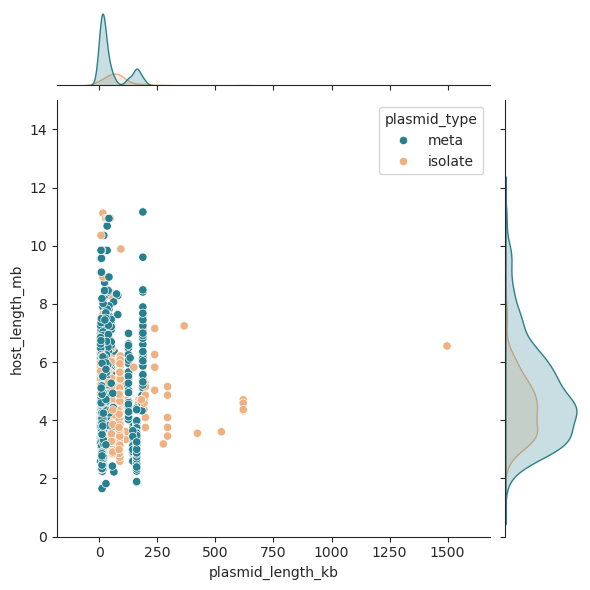

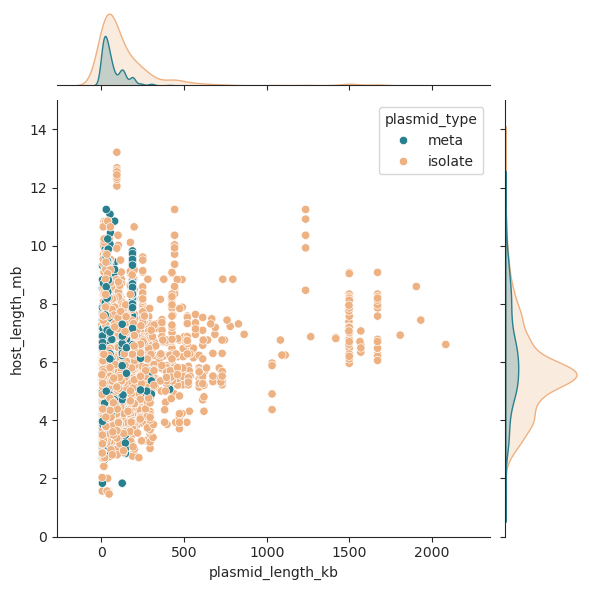

In [6]:
# same graph just changing the hue and col

sns.set_style("ticks")

g1 = sns.jointplot(
    data=df.filter(pl.col("host_type") == "mag")
    .sample(n=1541, shuffle=True, seed=42)
    .to_pandas(),
    x="plasmid_length_kb",
    y="host_length_mb",
    hue="plasmid_type",
    palette={"isolate": "#EEB182", "meta": "#287F8E"},
    ylim=(0, 15),
)

g2 = sns.jointplot(
    data=df.filter(pl.col("host_type") == "isolate")
    .sample(n=4038, shuffle=True, seed=42)
    .to_pandas(),
    x="plasmid_length_kb",
    y="host_length_mb",
    hue="plasmid_type",
    palette={"isolate": "#EEB182", "meta": "#287F8E"},
    ylim=(0, 15),
)

# g2.ax_joint.yaxis.set_ticks(list(range(0, 14, 2)))

# g.set_axis_labels("Plasmid size (Kb)", "Host size (Mb)")
# g.ax_joint.set_title("Plasmid size vs Host size")
# g.legend.set_title("Plasmid origin")


g1.savefig("../figures/complete_plasmid_host_size_mag.pdf", bbox_inches="tight")
g2.savefig("../figures/complete_plasmid_host_size_isolate.pdf", bbox_inches="tight")


In [7]:
# # same graph just changing the hue and col

# sns.set_style("whitegrid")

# g = sns.relplot(
#     data=df.sample(n=5579, shuffle=True, seed=42).to_pandas(),
#     x="plasmid_length_kb",
#     y="host_length_mb",
#     col="host_type",
#     hue="plasmid_type",
#     height=4,
#     aspect=1,
#     facet_kws={"despine": False},
#     palette={"isolate": "#EEB182", "meta": "#287F8E"},
# )

# g.set_axis_labels("Plasmid size (Kb)", "Host size (Mb)")
# g.set_titles("{col_name} host")
# g.legend.set_title("Plasmid origin")

# plt.savefig("../figures/complete_plasmid_host_size.pdf", bbox_inches="tight")


Plasmids 

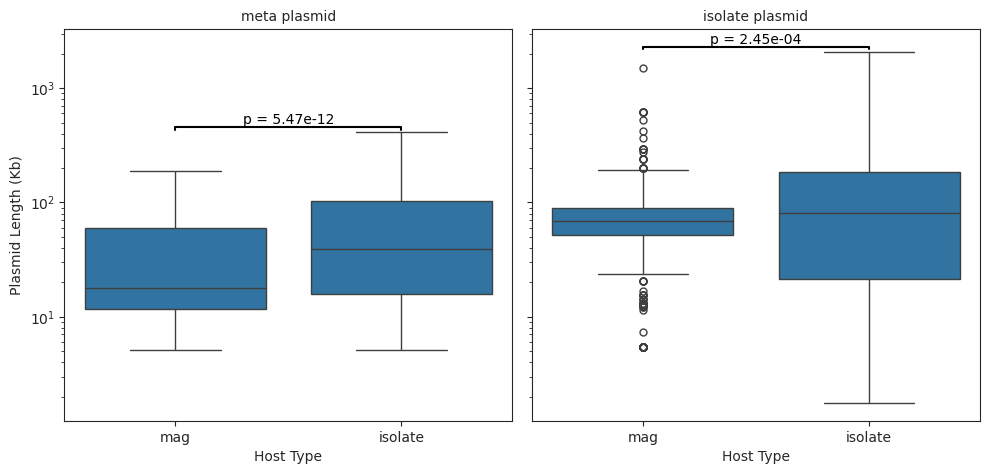

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Convert Polars DataFrame to pandas
data = df.to_pandas()

# Create boxplot
g = sns.catplot(
    data=data,
    x="host_type",
    y="plasmid_length_kb",
    kind="box",
    col="plasmid_type",
    log_scale=True,
    facet_kws={"despine": False},
)

# Perform Mann-Whitney U tests for each plasmid_type
plasmid_types = data["plasmid_type"].unique()
p_values = []

for plasmid in plasmid_types:
    subset = data[data["plasmid_type"] == plasmid]
    host_types = subset["host_type"].unique()
    if len(host_types) == 2:
        group1 = subset[subset["host_type"] == "mag"]["plasmid_length_kb"]
        group2 = subset[subset["host_type"] == "isolate"]["plasmid_length_kb"]
        stat, p = mannwhitneyu(group1, group2, alternative="less")
        p_values.append(p)
    else:
        p_values.append(None)

# Multiple test correction using Benjamini-Hochberg
valid_p_values = [p for p in p_values if p is not None]
corrected_p_values = multipletests(valid_p_values, method="fdr_bh")[1]

# Map corrected p-values back to plasmid_types
corrected_p_dict = {}
i = 0
for plasmid in plasmid_types:
    if p_values[i] is not None:
        corrected_p_dict[plasmid] = corrected_p_values[i]
    else:
        corrected_p_dict[plasmid] = None
    i += 1

# Annotate corrected p-values and draw lines on each facet
for ax, plasmid in zip(g.axes.flatten(), plasmid_types):
    p = corrected_p_dict.get(plasmid)
    if p is not None:
        # Determine y position for the annotation line
        subset = data[data["plasmid_type"] == plasmid]
        y_max = subset["plasmid_length_kb"].max()
        y, h = y_max * 1.05, y_max * 0.05  # Adjust multipliers as needed for spacing

        # Draw the lines
        ax.plot([0, 0, 1, 1], [y, y + h, y + h, y], lw=1.5, c="k")
        ax.text(0.5, y + h, f"p = {p:.2e}", ha="center", va="bottom", color="k")

# Set labels and titles
g.set_axis_labels("Host Type", "Plasmid Length (Kb)")
g.set_titles("{col_name} plasmid")
g.figure.subplots_adjust(top=0.9)
# g.fig.suptitle("Plasmid Length by Host Type and Plasmid Type")

# Save the figure with corrected p-values and annotation lines
plt.savefig("../figures/complete_plasmid_size_per_host_type.pdf", bbox_inches="tight")


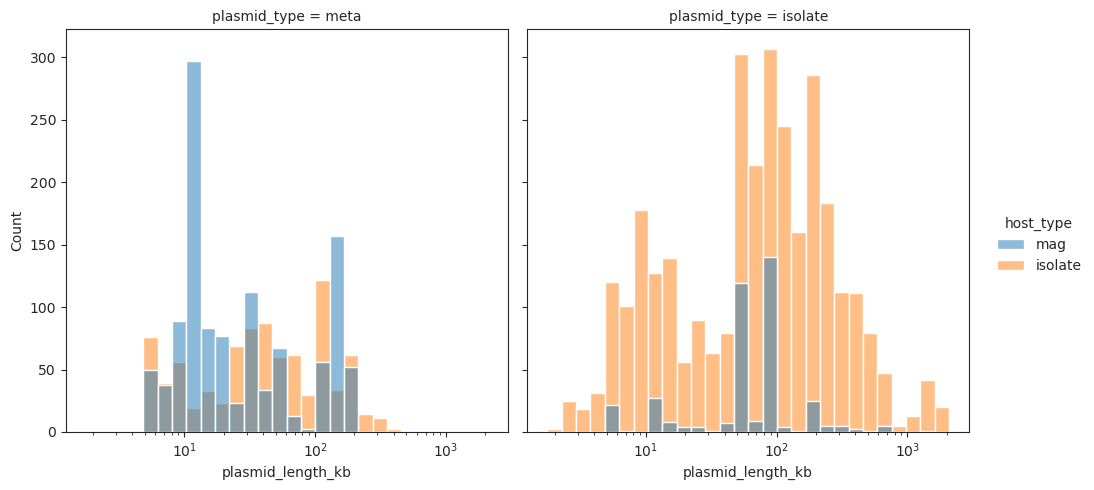

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Convert Polars DataFrame to pandas
data = df.to_pandas()

# Create boxplot
g = sns.displot(
    data=data,
    hue="host_type",
    x="plasmid_length_kb",
    kind="hist",
    col="plasmid_type",
    log_scale=True,
    facet_kws={"despine": False},
)


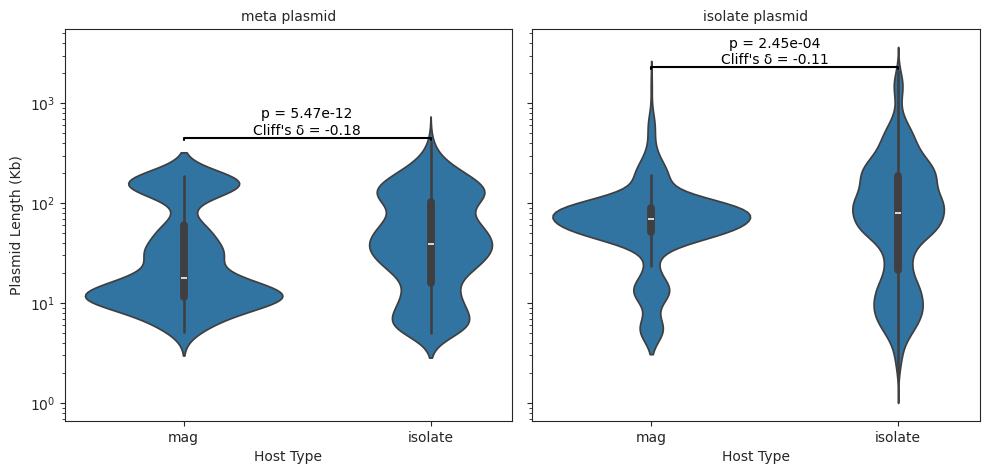

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests


# Function to calculate Cliff's Delta
def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)
    n_x, n_y = len(x), len(y)
    # Count the number of times elements in x are greater than elements in y, and vice versa
    more = np.sum(x[:, None] > y)
    less = np.sum(x[:, None] < y)
    delta = (more - less) / (n_x * n_y)
    return delta


# Convert Polars DataFrame to pandas
data = df.to_pandas()

# Create boxplot
g = sns.catplot(
    data=data,
    x="host_type",
    y="plasmid_length_kb",
    kind="violin",
    col="plasmid_type",
    log_scale=True,
    facet_kws={"despine": False},
)

# Perform Mann-Whitney U tests and calculate Cliff's Delta for each plasmid_type
plasmid_types = data["plasmid_type"].unique()
p_values = []
cliff_deltas = []

for plasmid in plasmid_types:
    subset = data[data["plasmid_type"] == plasmid]
    host_types = subset["host_type"].unique()
    if len(host_types) == 2:
        group1 = subset[subset["host_type"] == "mag"]["plasmid_length_kb"]
        group2 = subset[subset["host_type"] == "isolate"]["plasmid_length_kb"]
        stat, p = mannwhitneyu(group1, group2, alternative="less")
        p_values.append(p)
        delta = cliffs_delta(group1, group2)
        cliff_deltas.append(delta)
    else:
        p_values.append(None)
        cliff_deltas.append(None)

# Multiple test correction using Benjamini-Hochberg
valid_p_values = [p for p in p_values if p is not None]
corrected_p_values = multipletests(valid_p_values, method="fdr_bh")[1]

# Map corrected p-values back to plasmid_types
corrected_p_dict = {}
i = 0
for plasmid in plasmid_types:
    if p_values[i] is not None:
        corrected_p_dict[plasmid] = corrected_p_values[i]
    else:
        corrected_p_dict[plasmid] = None
    i += 1

# Map Cliff's Delta values to plasmid_types
cliff_dict = {}
i = 0
for plasmid in plasmid_types:
    if cliff_deltas[i] is not None:
        cliff_dict[plasmid] = cliff_deltas[i]
    else:
        cliff_dict[plasmid] = None
    i += 1

# Annotate corrected p-values and Cliff's Delta values; draw lines on each facet
for ax, plasmid in zip(g.axes.flatten(), plasmid_types):
    p = corrected_p_dict.get(plasmid)
    delta = cliff_dict.get(plasmid)
    if p is not None and delta is not None:
        # Determine y position for the annotation line
        subset = data[data["plasmid_type"] == plasmid]
        y_max = subset["plasmid_length_kb"].max()
        y, h = y_max * 1.05, y_max * 0.05  # Adjust multipliers as needed for spacing

        # Draw the annotation line
        ax.plot([0, 0, 1, 1], [y, y + h, y + h, y], lw=1.5, c="k")
        # Annotate with both p-value and Cliff's Delta
        ax.text(
            0.5,
            y + h,
            f"p = {p:.2e}\nCliff's δ = {delta:.2f}",
            ha="center",
            va="bottom",
            color="k",
        )

# Set labels and titles
g.set_axis_labels("Host Type", "Plasmid Length (Kb)")
g.set_titles("{col_name} plasmid")
g.figure.subplots_adjust(top=0.9)
# g.fig.suptitle("Plasmid Length by Host Type and Plasmid Type")

# Save the figure with corrected p-values, Cliff's Delta annotations, and annotation lines
# plt.savefig("../figures/complete_plasmid_size_per_host_type.pdf", bbox_inches="tight")


In [13]:
data[data["plasmid_type"] == "meta"].drop_duplicates(subset=["Plasmid"])

,Plasmid,host,method,accession,host_type,host_size,plasmid_length,plasmid_length_kb,host_length_mb,plasmid_type
0,3300003203|JGI25406J46586_10000083,d__Bacteria;p__Acidobacteriota;c__Blastocatell...,iphop-blast,GCA_020199775.1,mag,5908740,43171,43.171,5.908740,meta
2,3300003320|rootH2_10087780,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,iphop-RaFAH,3000227121,isolate,8341603,12299,12.299,8.341603,meta
7,3300003578|Ga0006562J51391_1000896,d__Bacteria;p__Bacillota;c__Bacilli;o__Bacilla...,iphop-blast,GCA_000409525.1,isolate,5096309,9558,9.558,5.096309,meta
10,3300004683|Ga0068232_11,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,2885312484,isolate,6415165,39076,39.076,6.415165,meta
43,3300005530|Ga0070679_100001519,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,iphop-blast,GCF_004799035.1,isolate,4060504,20669,20.669,4.060504,meta
...,...,...,...,...,...,...,...,...,...,...
4985,MGYA00645652|ERZ12343717.60-NODE-60-length-608...,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,GCF_002165615.1,isolate,5368676,60814,60.814,5.368676,meta
4998,MGYA00645703|ERZ12633434.317-NODE-318-length-5...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,iphop-blast,GCF_001517245.1,isolate,2848002,50376,50.376,2.848002,meta
4999,MGYA00645709|ERZ12633437.280-NODE-280-length-5...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,iphop-blast,GCF_001517245.1,isolate,2848002,50047,50.047,2.848002,meta
5000,MGYA00645709|ERZ12633437.555-NODE-555-length-3...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,iphop-blast,GCF_003052605.1,isolate,5199651,35169,35.169,5.199651,meta


In [ ]:
data[data["plasmid_type"] == "isolate"].drop_duplicates(subset=["Plasmid"])

,Plasmid,host,method,accession,host_type,host_size,plasmid_length,plasmid_length_kb,host_length_mb,plasmid_type
1989,IMGPR_plasmid_2506210028_000001,d__Bacteria;p__Cyanobacteriota;c__Cyanobacteri...,isolate,2506210028,isolate,6698929,5012,5.012,6.698929,isolate
1990,IMGPR_plasmid_2507262027_000001,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-iPHoP-RF,3001635449,isolate,5384582,180306,180.306,5.384582,isolate
1993,IMGPR_plasmid_2507262027_000002,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,2839752880,isolate,3785845,285905,285.905,3.785845,isolate
2002,IMGPR_plasmid_2509276031_000007,d__Bacteria;p__Cyanobacteriota;c__Cyanobacteri...,isolate,2509276031,isolate,7966510,20803,20.803,7.966510,isolate
2003,IMGPR_plasmid_2510065092_000024,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-iPHoP-RF,GCF_019684195.1,isolate,6360071,41470,41.470,6.360071,isolate
...,...,...,...,...,...,...,...,...,...,...
5574,Refsoil_NZ_HF677572.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate,GCF_003850905.1,isolate,3085982,18169,18.169,3.085982,isolate
5575,Refsoil_NZ_HG916853.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate,GCF_024748835.1,isolate,7442326,151687,151.687,7.442326,isolate
5576,Refsoil_NZ_HG916854.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate,GCF_024748835.1,isolate,7442326,759787,759.787,7.442326,isolate
5577,Refsoil_NZ_HG916855.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate,GCF_024748835.1,isolate,7442326,1932030,1932.030,7.442326,isolate


In [14]:
isolate_isolate = df.filter(
    (pl.col("host_type") == "isolate") & (pl.col("plasmid_type") == "isolate")
)


Mann-Whitney U test p-value: 2.12e-47


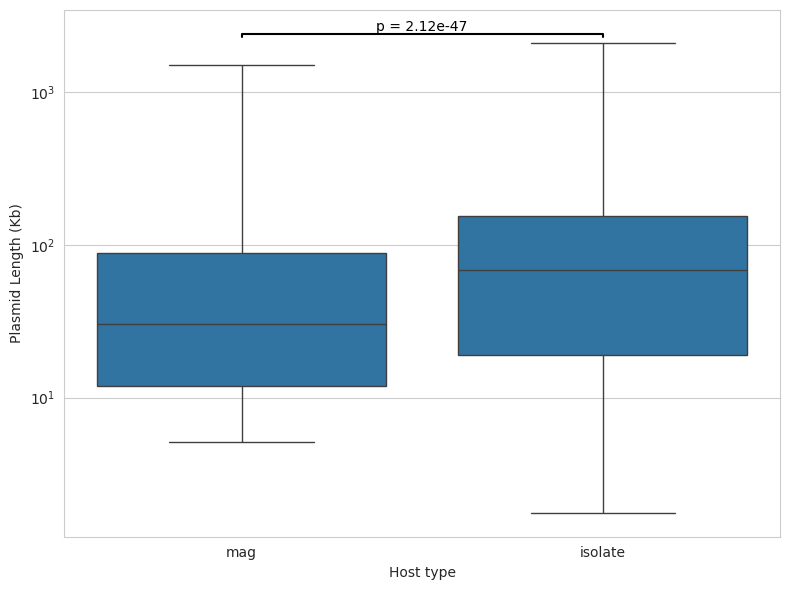

In [12]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test on 'plasmid_length_kb' between host types
isolate = df.filter(pl.col("host_type") == "isolate")["plasmid_length_kb"].to_numpy()
mag = df.filter(pl.col("host_type") == "mag")["plasmid_length_kb"].to_numpy()

stat, p = mannwhitneyu(mag, isolate, alternative="less")

print(f"Mann-Whitney U test p-value: {p:.2e}")

# Create boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=df.to_pandas(), x="host_type", y="plasmid_length_kb", log_scale=True
)
plt.xlabel("Host type")
plt.ylabel("Plasmid Length (Kb)")

# Determine y-position for annotation
y_max = df["plasmid_length_kb"].max()
y, h = y_max * 1.1, y_max * 0.05  # Adjust these values as needed

# Add significance line
ax.plot([0, 0, 1, 1], [y, y + h, y + h, y], lw=1.5, c="k")

# Add p-value text
ax.text(0.5, y + h, f"p = {p:.2e}", ha="center", va="bottom", color="k")

plt.tight_layout()
plt.savefig("../figures/complete_plasmid_host_size_boxplot.pdf", bbox_inches="tight")


Plasmids

In [13]:
np.median(isolate), np.median(mag)

(68.215, 30.286)